In [1]:
from keras.datasets import mnist
from matplotlib import pyplot as plt
plt.style.use('dark_background')
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout
from keras.utils import normalize, to_categorical

Using TensorFlow backend.


In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

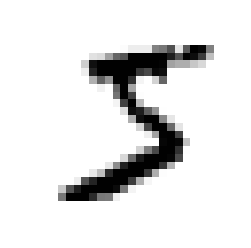

In [10]:
plt.imshow(X_train[0], cmap = plt.cm.binary)
plt.show()

In [11]:
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

<hr>
<h2> Without dropout </h2>

In [13]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_3 (Activation)    (None, 10)               

In [14]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [15]:
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    verbose = 1,
    shuffle=True
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 5s 95us/step - loss: 0.2760 - accuracy: 0.9201 - val_loss: 0.1157 - val_accuracy: 0.9662
Epoch 2/10
54000/54000 [==============================] - 4s 83us/step - loss: 0.1135 - accuracy: 0.9650 - val_loss: 0.0930 - val_accuracy: 0.9717
Epoch 3/10
54000/54000 [==============================] - 5s 87us/step - loss: 0.0759 - accuracy: 0.9760 - val_loss: 0.0824 - val_accuracy: 0.9757
Epoch 4/10
54000/54000 [==============================] - 5s 89us/step - loss: 0.0552 - accuracy: 0.9821 - val_loss: 0.0853 - val_accuracy: 0.9727
Epoch 5/10
54000/54000 [==============================] - 5s 83us/step - loss: 0.0415 - accuracy: 0.9862 - val_loss: 0.0891 - val_accuracy: 0.9758
Epoch 6/10
54000/54000 [==============================] - 5s 89us/step - loss: 0.0313 - accuracy: 0.9895 - val_loss: 0.0869 - val_accuracy: 0.9753
Epoch 7/10
54000/54000 [==============================] - 4s 80us/ste

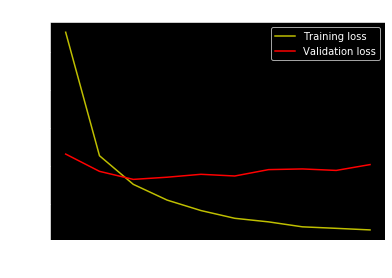

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

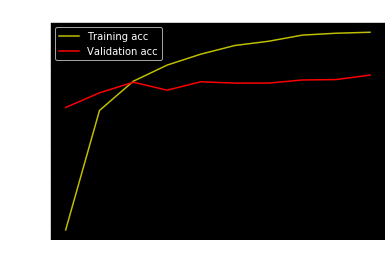

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [20]:
test_loss, test_acc = model.evaluate(X_test, y_test)
test_acc

10000/10000 [==============================] - 0s 46us/step


0.973800003528595

<hr>
<h1> With Dropout </h1>

In [21]:
model_dropout = Sequential()
model_dropout.add(Flatten(input_shape=(28, 28)))
model_dropout.add(Dense(128))
model_dropout.add(Dropout(0.5))
model_dropout.add(Activation('relu'))
model_dropout.add(Dense(128))
model_dropout.add(Dropout(0.5))
model_dropout.add(Activation('relu'))
model_dropout.add(Dense(10))
model_dropout.add(Activation('softmax'))
model_dropout.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
activation_4 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
activation_5 (Activation)    (None, 128)              

In [22]:
model_dropout.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [23]:
history_dropout = model_dropout.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    verbose = 1,
    shuffle=True
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 5s 94us/step - loss: 0.5426 - accuracy: 0.8355 - val_loss: 0.1627 - val_accuracy: 0.9528
Epoch 2/10
54000/54000 [==============================] - 5s 91us/step - loss: 0.2901 - accuracy: 0.9167 - val_loss: 0.1267 - val_accuracy: 0.9622
Epoch 3/10
54000/54000 [==============================] - 5s 97us/step - loss: 0.2387 - accuracy: 0.9313 - val_loss: 0.1086 - val_accuracy: 0.9683
Epoch 4/10
54000/54000 [==============================] - 5s 97us/step - loss: 0.2154 - accuracy: 0.9382 - val_loss: 0.1034 - val_accuracy: 0.9688
Epoch 5/10
54000/54000 [==============================] - 5s 92us/step - loss: 0.1937 - accuracy: 0.9434 - val_loss: 0.0989 - val_accuracy: 0.9687
Epoch 6/10
54000/54000 [==============================] - 5s 89us/step - loss: 0.1800 - accuracy: 0.9484 - val_loss: 0.0887 - val_accuracy: 0.9738
Epoch 7/10
54000/54000 [==============================] - 5s 89us/ste

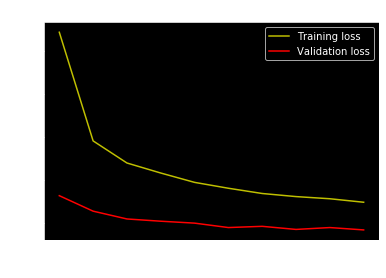

In [24]:
loss = history_dropout.history['loss']
val_loss = history_dropout.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

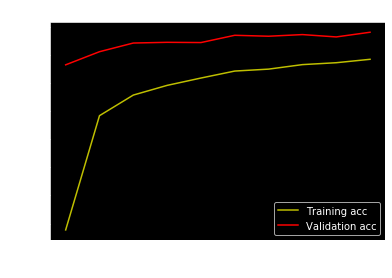

In [26]:
acc = history_dropout.history['accuracy']
val_acc = history_dropout.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [27]:
test_loss, test_acc = model_dropout.evaluate(X_test, y_test)
test_acc

10000/10000 [==============================] - 0s 49us/step


0.9728000164031982